In [70]:
import numpy as np
import matplotlib.pyplot as plt

from CPU.cpu import big_cpu_clock_list
from GPU.gpu import gpu_clock_list

plt.rcParams['figure.figsize'] = (17, 2)
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 13

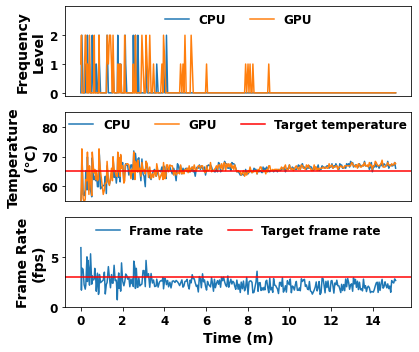

In [160]:
data = np.genfromtxt('states.csv', delimiter=',')
ts, c_c, g_c, c_p, c_t, g_t, fps = [data[:, col] for col in range(data.shape[1])]
ts = (ts - ts[0]) / 60
# c_c = np.array(big_cpu_clock_list)[np.array(c_c).astype(int)] / 1e6
# g_c = np.array(gpu_clock_list)[np.array(g_c).astype(int)] / 1e3
c_p /= 10

fig, axes = plt.subplots(3, figsize=(6, 5))
axes[0].plot(ts, c_c, label='CPU')
axes[0].plot(ts, g_c, label='GPU')
axes[0].set_ylim(-.1, 3)
axes[0].set_ylabel('Frequency\nLevel')
axes[0].set_yticks(list(range(3)))
axes[0].set_xticks([])
axes[0].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=2, frameon=False)

axes[1].plot(ts, c_t, label='CPU')
axes[1].plot(ts, g_t, label='GPU')
axes[1].axhline(65, color='red', label='Target temperature')
axes[1].set_ylim(55, 85)
axes[1].set_ylabel('Temperature\n(\u2103)')
axes[1].set_xticks([])
axes[1].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=3, frameon=False)

axes[2].plot(ts, fps, label='Frame rate')
axes[2].axhline(3, color='red', label='Target frame rate')
axes[2].set_ylabel('Frame Rate\n(fps)')
axes[2].set_ylim(0, 9)
axes[2].set_xlabel('Time (m)')
axes[2].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=2, frameon=False)

plt.tight_layout()
plt.savefig(r'C:\Users\chaos\Downloads\zTT.png')
plt.show()

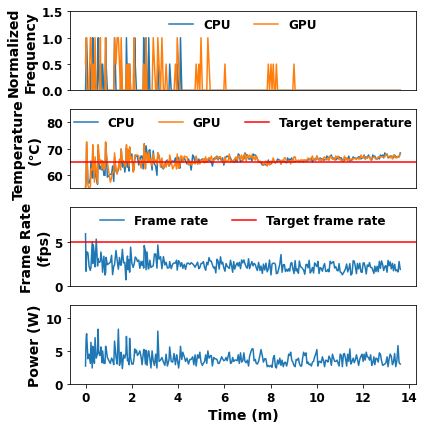

In [153]:
fig, axes = plt.subplots(4, figsize=(6, 6))
axes[0].plot(ts, c_c / c_c.max(), label='CPU')
axes[0].plot(ts, g_c / g_c.max(), label='GPU')
axes[0].set_ylim(0, 1.5)
axes[0].set_ylabel('Normalized\nFrequency')
axes[0].set_xticks([])
axes[0].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=2, frameon=False)

axes[1].plot(ts, c_t, label='CPU')
axes[1].plot(ts, g_t, label='GPU')
axes[1].axhline(65, color='red', label='Target temperature')
axes[1].set_ylim(55, 85)
axes[1].set_ylabel('Temperature\n(\u2103)')
axes[1].set_xticks([])
axes[1].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=3, frameon=False)

axes[2].plot(ts, fps, label='Frame rate')
axes[2].axhline(5, color='red', label='Target frame rate')
axes[2].set_ylabel('Frame Rate\n(fps)')
axes[2].set_ylim(0, 9)
axes[2].set_xticks([])
axes[2].legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=2, frameon=False)

axes[3].plot(ts, c_p)
axes[3].set_ylabel('Power (W)')
axes[3].set_xlabel('Time (m)')
axes[3].set_ylim(0, 12)

plt.tight_layout()
plt.show()